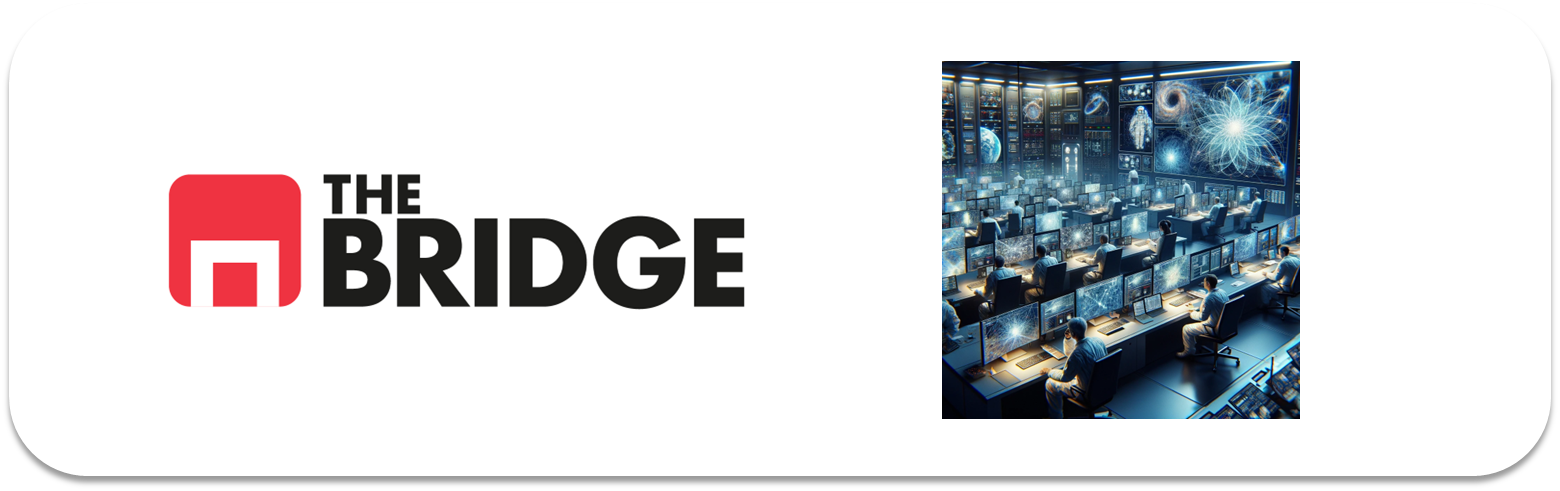

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [16]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [10]:
import os
base_path = "C:/Users/hp/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data"


print("Archivos en base_path:", os.listdir(base_path))


Archivos en base_path: ['github_test', 'github_train_0', 'github_train_1', 'github_train_2', 'github_train_3']


In [11]:
import os

# Verifica si la ruta es correcta antes de cargar imágenes
if os.path.exists(base_path):
    print("✅ Ruta correcta:", base_path)
    print("Archivos dentro:", os.listdir(base_path))
else:
    print("❌ Error: La ruta no existe. Verifica base_path.")


✅ Ruta correcta: C:/Users/hp/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data
Archivos dentro: ['github_test', 'github_train_0', 'github_train_1', 'github_train_2', 'github_train_3']



1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

✅ Dataset de entrenamiento cargado: (4000, 32, 32, 3), (4000,)
✅ Dataset de prueba cargado: (1000, 32, 32, 3), (1000,)


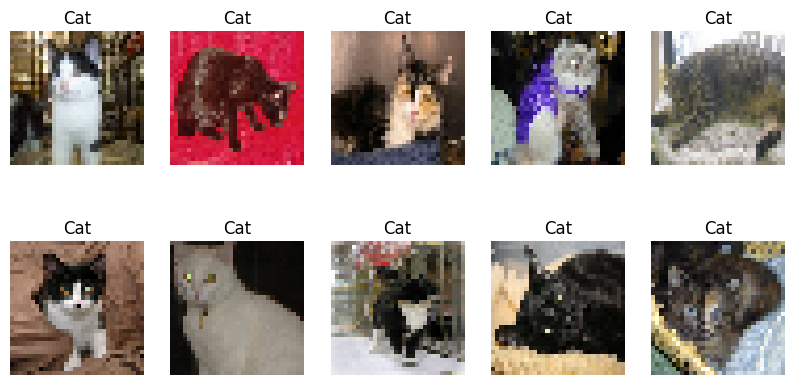

In [21]:



from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 📂 Ruta base (ajusta según tu directorio)
base_path = "C:/Users/hp/DS_Online_Octubre24_Exercises/05_Deep_Learning/Sprint_17/Unidad_01/Practica_Obligatoria/data"

# 📌 Directorios de imágenes
train_dirs = ["github_train_0", "github_train_1", "github_train_2", "github_train_3"]
test_dir = "github_test"

# 📏 Tamaño de las imágenes
IMG_SIZE = (32, 32)

# 🔹 Función para cargar imágenes y etiquetas desde un directorio
def load_images_from_folder(folder):
    images = []
    labels = []

    # Verificar si la carpeta existe
    if not os.path.exists(folder):
        print(f"⚠️ La carpeta {folder} no existe. Verifica la ruta.")
        return np.array([]), np.array([])

    # Leer imágenes en la carpeta
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder, filename)

            # Cargar imagen con TensorFlow
            img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionar a 32x32
            img_array = img_to_array(img) / 255.0  # Convertir a array y normalizar
            images.append(img_array)

            # Etiqueta: 1 = Perro, 0 = Gato
            label = 1 if "dog" in filename.lower() else 0
            labels.append(label)

    return np.array(images), np.array(labels)

# ✅ Cargar imágenes de entrenamiento
X_train, y_train = [], []

for train_dir in train_dirs:
    path = os.path.join(base_path, train_dir)

    if os.path.exists(path):
        X_part, y_part = load_images_from_folder(path)
        if X_part.size > 0:  # Solo agregar si hay imágenes en la carpeta
            X_train.append(X_part)
            y_train.append(y_part)
    else:
        print(f"⚠️ La carpeta {path} no existe. Saltando...")

# Concatenar datos de entrenamiento
if X_train:
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)
    print(f"✅ Dataset de entrenamiento cargado: {X_train.shape}, {y_train.shape}")
else:
    print("❌ No se encontraron imágenes de entrenamiento.")

# ✅ Cargar imágenes de prueba
test_path = os.path.join(base_path, test_dir)

if os.path.exists(test_path):
    X_test, y_test = load_images_from_folder(test_path)
    print(f"✅ Dataset de prueba cargado: {X_test.shape}, {y_test.shape}")
else:
    print("❌ No se encontró la carpeta de test.")

# 🔍 📊 Mostrar algunas imágenes de entrenamiento para verificar
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_train[i])
    ax.set_title("Dog" if y_train[i] == 1 else "Cat")
    ax.axis("off")
plt.show()



2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

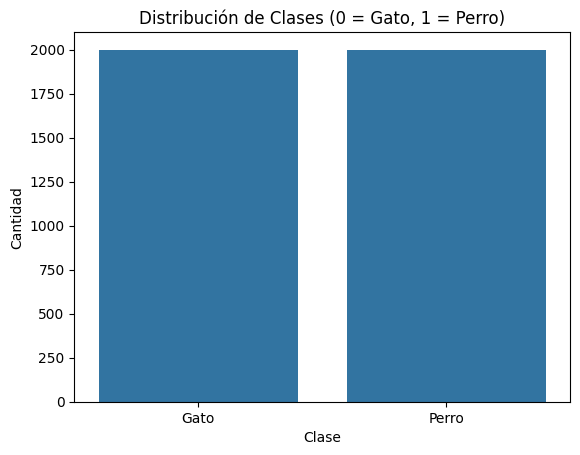

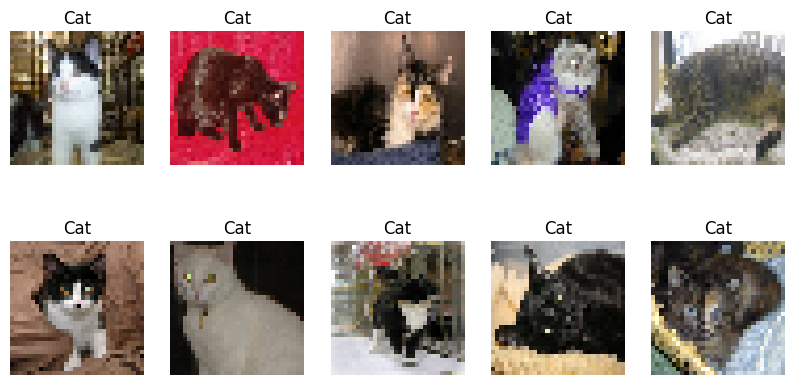

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,561 (1.20 MB)

 Trainable params: 314,561 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import shuffle




import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 🔹 Ver distribución de clases
def plot_class_distribution(y_train):
    sns.countplot(x=y_train)
    plt.title("Distribución de Clases (0 = Gato, 1 = Perro)")
    plt.xlabel("Clase")
    plt.ylabel("Cantidad")
    plt.xticks([0, 1], ["Gato", "Perro"])
    plt.show()

plot_class_distribution(y_train)

# 🔹 Mostrar algunas imágenes con etiquetas
def plot_sample_images(X_train, y_train):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i in range(10):
        ax = axes[i // 5, i % 5]
        ax.imshow(X_train[i])
        ax.set_title("Dog" if y_train[i] == 1 else "Cat")
        ax.axis("off")
    plt.show()

plot_sample_images(X_train, y_train)

# ✅ Barajar los datos para mejorar la aleatoriedad en el entrenamiento
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# 🔹 Construcción del modelo CNN
model = Sequential([
    # 🔹 Bloque 1: Convolución + MaxPooling
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    # 🔹 Bloque 2: Convolución + MaxPooling
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # 🔹 Aplanar la salida y agregar capas densas
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización para evitar sobreajuste
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# 🔹 Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🔹 Resumen del modelo
model.summary()


3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5057 - loss: 0.6977 - val_accuracy: 0.6400 - val_loss: 0.6641
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6111 - loss: 0.6603 - val_accuracy: 0.6690 - val_loss: 0.6124
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6696 - loss: 0.6121 - val_accuracy: 0.6900 - val_loss: 0.6024
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6921 - loss: 0.5856 - val_accuracy: 0.6910 - val_loss: 0.5806
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6977 - loss: 0.5670 - val_accuracy: 0.7050 - val_loss: 0.5735
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7296 - loss: 0.5339 - val_accuracy: 0.7060 - val_loss: 0.5743
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7600 - loss: 0.4955 - val_accuracy: 0.7340 - val_loss: 0.5441
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7783 - loss: 0.4691 - val_accu

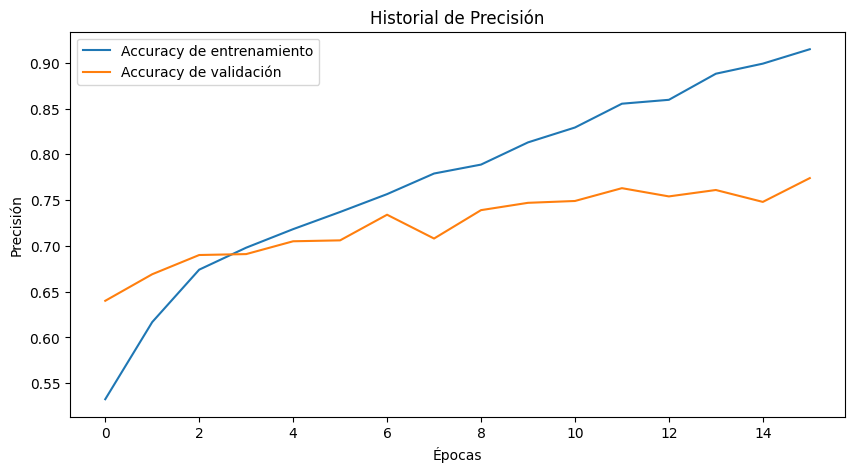

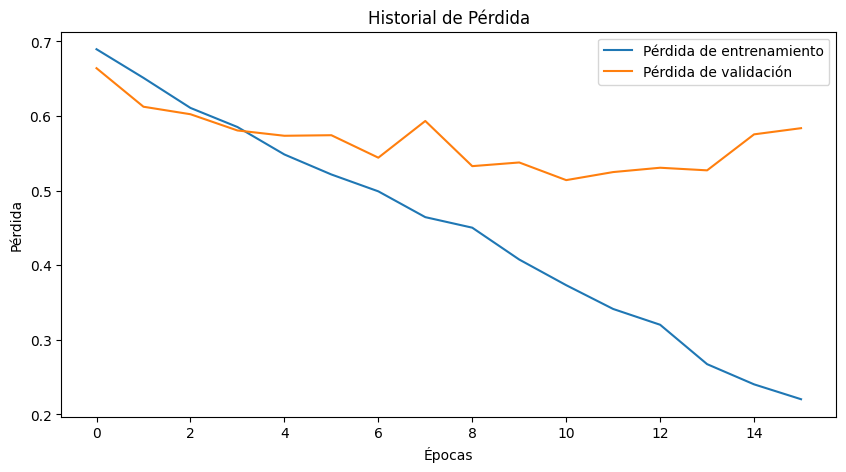

In [23]:
from tensorflow.keras.callbacks import EarlyStopping


# 🔹 Configurar EarlyStopping para detener el entrenamiento si no hay mejora en 5 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🔹 Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,  # Número máximo de épocas
    batch_size=32,
    callbacks=[early_stopping],  # Aplicamos el EarlyStopping
    verbose=1
)

# 🔹 Graficar el historial de entrenamiento
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.title("Historial de Precisión")

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Historial de Pérdida")

plt.show()


4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
📊 Reporte de Clasificación:
              precision    recall  f1-score   support

        Gato       0.74      0.77      0.75       500
       Perro       0.76      0.73      0.74       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



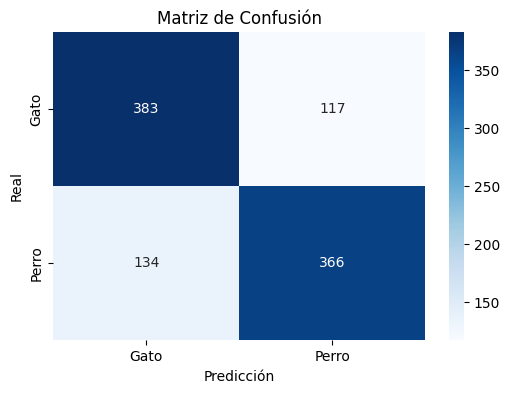

In [24]:


# 🔹 Obtener predicciones del modelo (probabilidades)
y_pred_probs = model.predict(X_test)

# 🔹 Convertir probabilidades a etiquetas (0 = Gato, 1 = Perro)
y_pred = (y_pred_probs > 0.5).astype("int32")

# 🔹 Reporte de Clasificación
print("📊 Reporte de Clasificación:")
report = classification_report(y_test, y_pred, target_names=["Gato", "Perro"])
print(report)

# 🔹 Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# 🔹 Visualizar la Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Gato", "Perro"], yticklabels=["Gato", "Perro"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


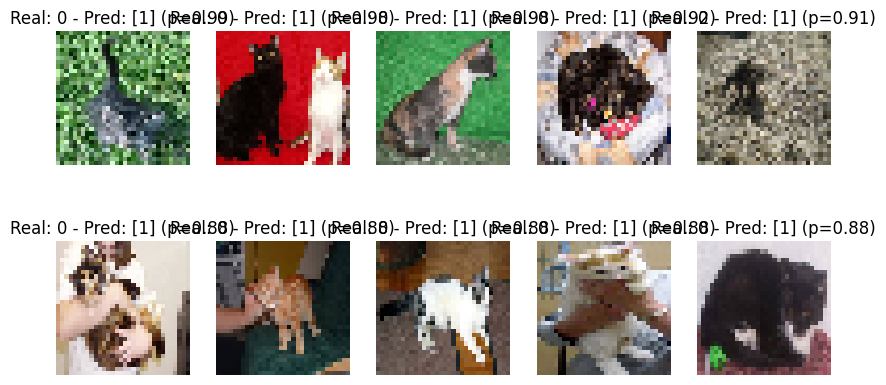

In [25]:


# 🔹 Obtener probabilidades de predicción del modelo
y_pred_probs = model.predict(X_test)

# 🔹 Convertir probabilidades a etiquetas (0 = Gato, 1 = Perro)
y_pred = (y_pred_probs > 0.5).astype("int32")

# 🔹 Identificar índices de errores (cuando la predicción es incorrecta)
incorrect_indices = np.where(y_pred.flatten() != y_test)[0]

# 🔹 Extraer las probabilidades de predicción de los errores
incorrect_probs = y_pred_probs[incorrect_indices]

# 🔹 Crear una lista con los índices, las probabilidades y la clase real
error_data = list(zip(incorrect_indices, incorrect_probs.flatten(), y_test[incorrect_indices]))

# 🔹 Ordenar por nivel de confianza en la clasificación errónea (probabilidad más alta en la clase incorrecta)
sorted_errors = sorted(error_data, key=lambda x: -x[1])

# 🔹 Seleccionar el 10% de los errores más seguros pero incorrectos
top_10_percent = sorted_errors[:int(len(sorted_errors) * 0.1)]

# 🔹 Mostrar las imágenes más difíciles de clasificar
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (idx, prob, real_label) in enumerate(top_10_percent[:10]):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_test[idx])
    ax.set_title(f"Real: {real_label} - Pred: {y_pred[idx]} (p={prob:.2f})")
    ax.axis("off")

plt.show()


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. "Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento."


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5169 - loss: 0.6996 - val_accuracy: 0.5500 - val_loss: 0.6780
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5641 - loss: 0.6800 - val_accuracy: 0.6450 - val_loss: 0.6426
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6026 - loss: 0.6629 - val_accuracy: 0.6230 - val_loss: 0.6425
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6217 - loss: 0.6448 - val_accuracy: 0.6390 - val_loss: 0.6390
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6219 - loss: 0.6505 - val_accuracy: 0.6390 - val_loss: 0.6288
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6578 - loss: 0.6213 - val_accuracy: 0.6670 - val_loss: 0.6071
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6356 - loss: 0.6308 - val_accuracy: 0.6040 - val_loss: 0.6909
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6498 - loss: 0.6246 - val_accu

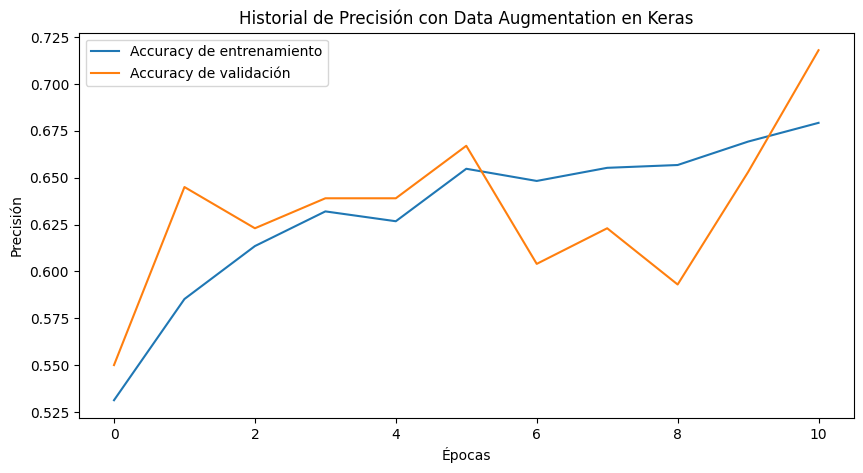

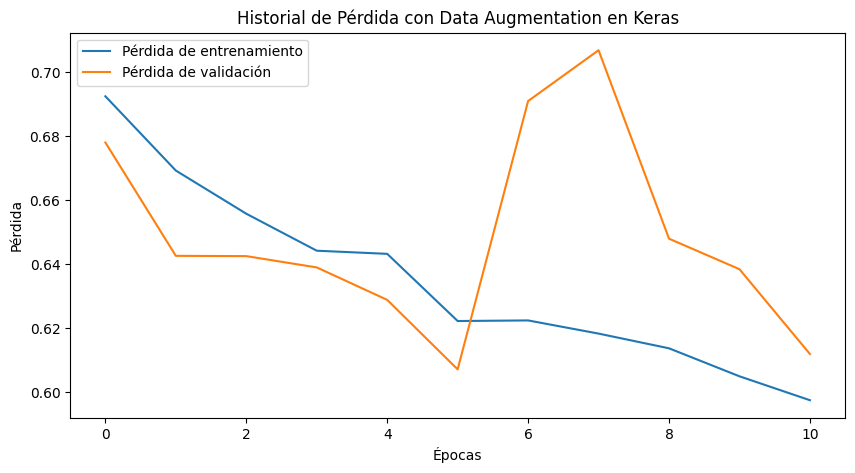

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 🔹 Configurar el generador de imágenes con Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,       
    width_shift_range=0.2,   
    height_shift_range=0.2,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True,    
    fill_mode='nearest'      
)

# 🔹 Aplicar Data Augmentation a los datos de entrenamiento
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# 🔹 Definir un nuevo modelo CNN con Keras
model_keras = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# 🔹 Compilar el modelo
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🔹 Configurar EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 🔹 Entrenar el modelo con Data Augmentation en Keras
history_keras = model_keras.fit(
    train_generator,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping],
    verbose=1
)

# 🔹 Graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history_keras.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history_keras.history['val_accuracy'], label='Accuracy de validación')
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.title("Historial de Precisión con Data Augmentation en Keras")

plt.figure(figsize=(10,5))
plt.plot(history_keras.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_keras.history['val_loss'], label='Pérdida de validación')
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Historial de Pérdida con Data Augmentation en Keras")

plt.show()


5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


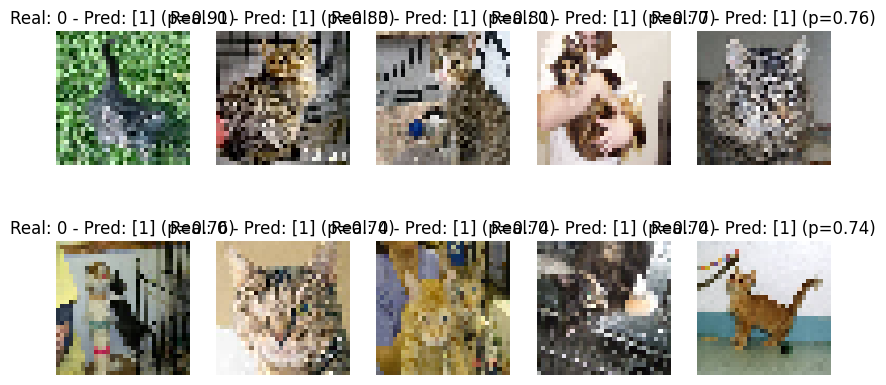

In [27]:


# 🔹 Obtener probabilidades de predicción del modelo en Keras
y_pred_probs_keras = model_keras.predict(X_test)

# 🔹 Convertir probabilidades a etiquetas (0 = Gato, 1 = Perro)
y_pred_keras = (y_pred_probs_keras > 0.5).astype("int32")

# 🔹 Identificar índices de errores (cuando la predicción es incorrecta)
incorrect_indices_keras = np.where(y_pred_keras.flatten() != y_test)[0]

# 🔹 Extraer las probabilidades de predicción de los errores
incorrect_probs_keras = y_pred_probs_keras[incorrect_indices_keras]

# 🔹 Crear una lista con los índices, las probabilidades y la clase real
error_data_keras = list(zip(incorrect_indices_keras, incorrect_probs_keras.flatten(), y_test[incorrect_indices_keras]))

# 🔹 Ordenar por nivel de confianza en la clasificación errónea (probabilidad más alta en la clase incorrecta)
sorted_errors_keras = sorted(error_data_keras, key=lambda x: -x[1])

# 🔹 Seleccionar el 10% de los errores más seguros pero incorrectos
top_10_percent_keras = sorted_errors_keras[:int(len(sorted_errors_keras) * 0.1)]

# 🔹 Mostrar las imágenes más difíciles de clasificar después del entrenamiento con Keras
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, (idx, prob, real_label) in enumerate(top_10_percent_keras[:10]):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_test[idx])
    ax.set_title(f"Real: {real_label} - Pred: {y_pred_keras[idx]} (p={prob:.2f})")
    ax.axis("off")

plt.show()
